In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

#### Data Preprocessing

In [2]:
data = pd.read_csv('Titanic_test.csv')
data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [3]:
data.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
data.shape

(418, 11)

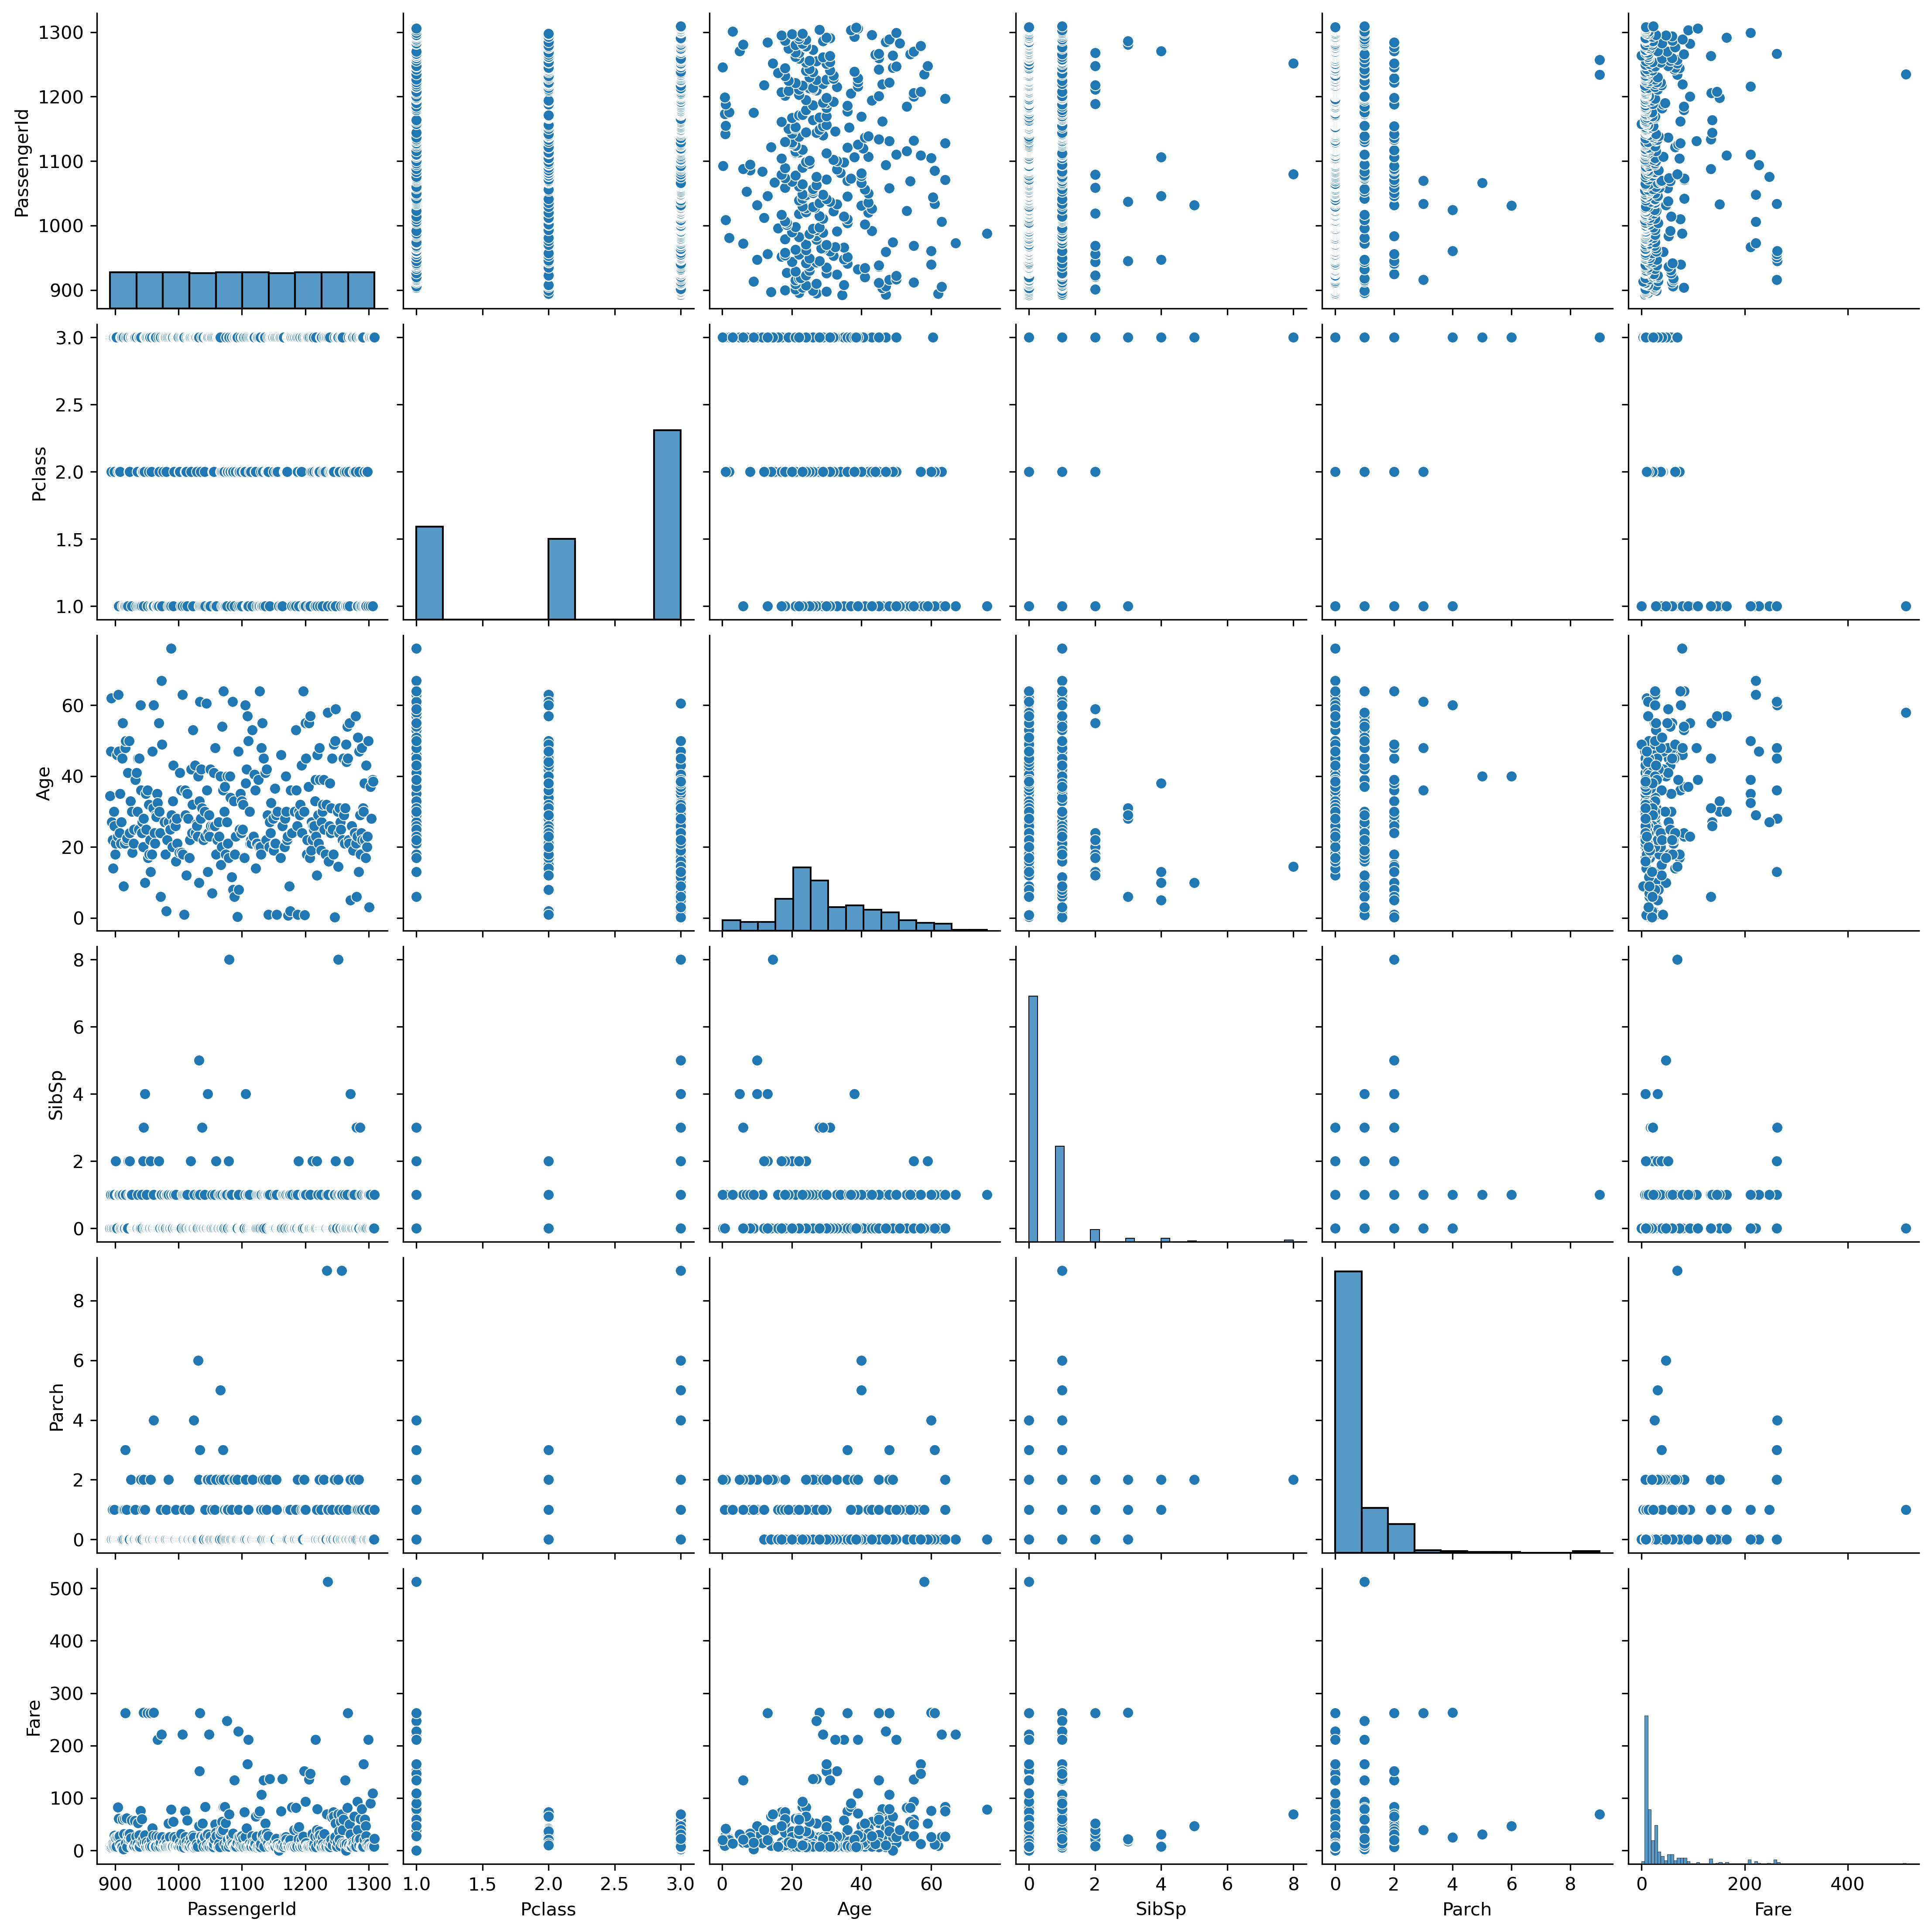

In [6]:
sns.pairplot(data)

<Axes: >

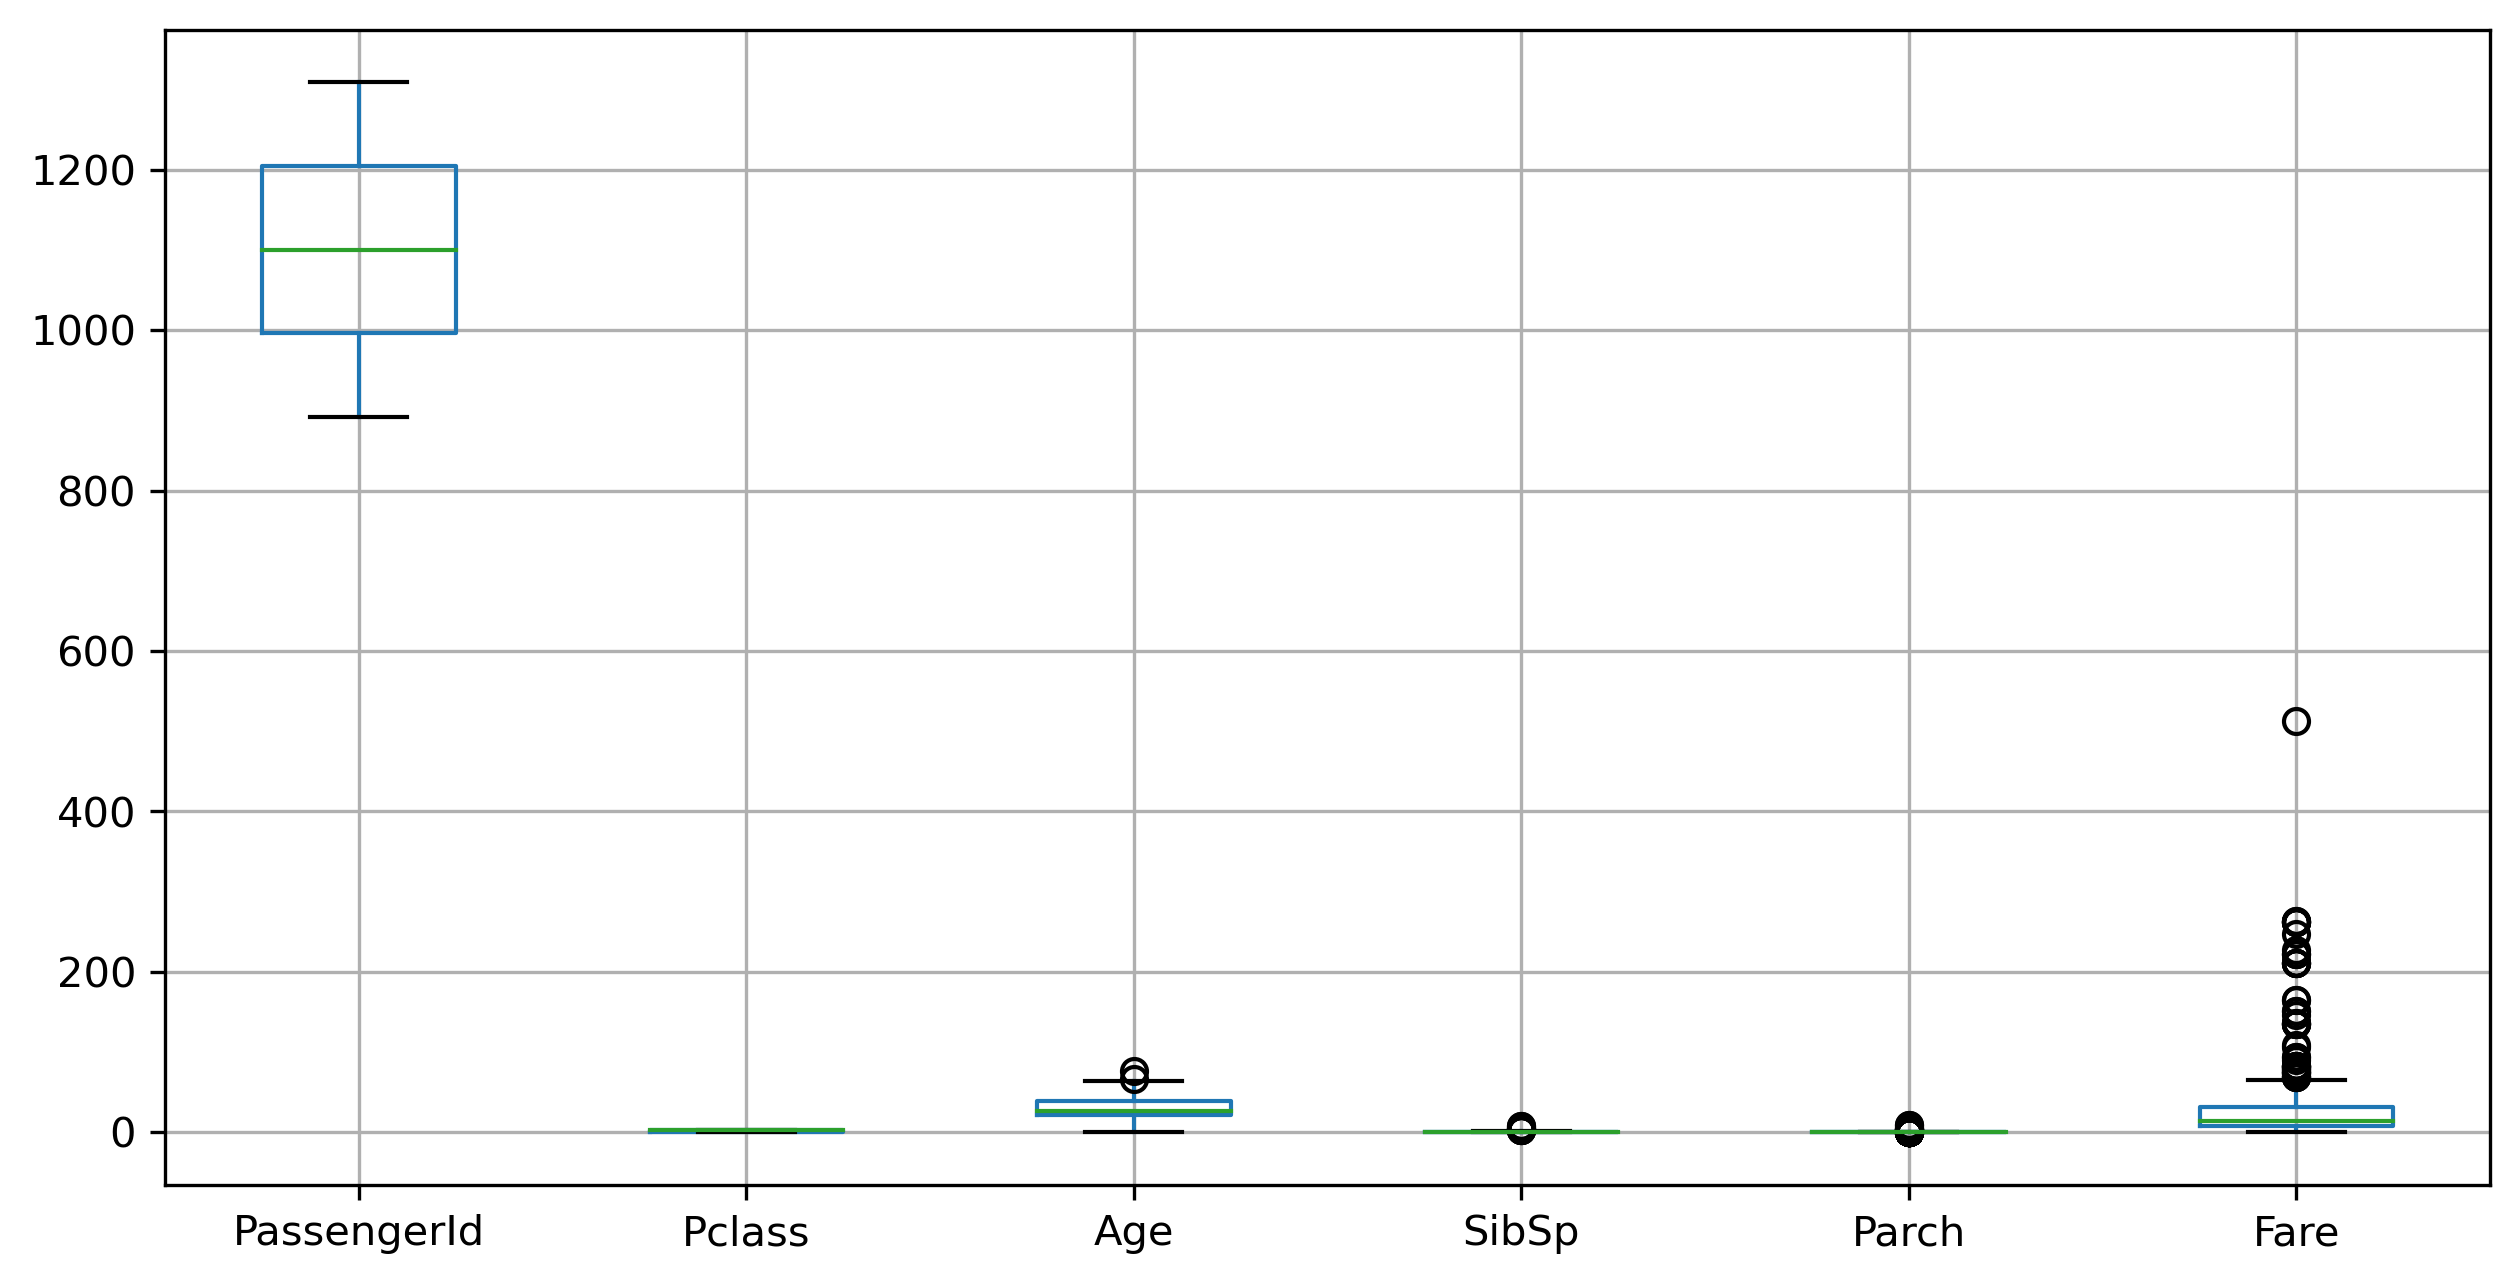

In [7]:
data.boxplot()

In [8]:
#Age column is of float and should be of datatype int
#converting it into int datatype
data['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [9]:
data['Age'].unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [10]:
data['Age'].value_counts()

Age
21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: count, Length: 79, dtype: int64

In [11]:
data['Age'] = np.nan_to_num(data['Age'], nan=0).astype(int)

In [12]:
data['Age'].dtypes

dtype('int32')

In [13]:
#now checking for duplicates
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [14]:
data.duplicated().sum()

0

In [15]:
data['Parch'].value_counts()

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

#### Handling missing values

In [16]:
data.isna()

PassengerId  Pclass   Name    Sex    Age  SibSp  Parch  Ticket   Fare  \
0          False   False  False  False  False  False  False   False  False   
1          False   False  False  False  False  False  False   False  False   
2          False   False  False  False  False  False  False   False  False   
3          False   False  False  False  False  False  False   False  False   
4          False   False  False  False  False  False  False   False  False   
..           ...     ...    ...    ...    ...    ...    ...     ...    ...   
413        False   False  False  False  False  False  False   False  False   
414        False   False  False  False  False  False  False   False  False   
415        False   False  False  False  False  False  False   False  False   
416        False   False  False  False  False  False  False   False  False   
417        False   False  False  False  False  False  False   False  False   

     Cabin  Embarked  
0     True     False  
1     True     False  
2     True     False  
3     True     False  
4     True     False  
..     ...       ...  
413   True     False  
414  False     False  
415   True     False  
416   True     False  
417   True     False  

[418 rows x 11 columns]

In [17]:
data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
#in columns Cabin and Embarked there are missing values 
#we will treate those values 

<Axes: >

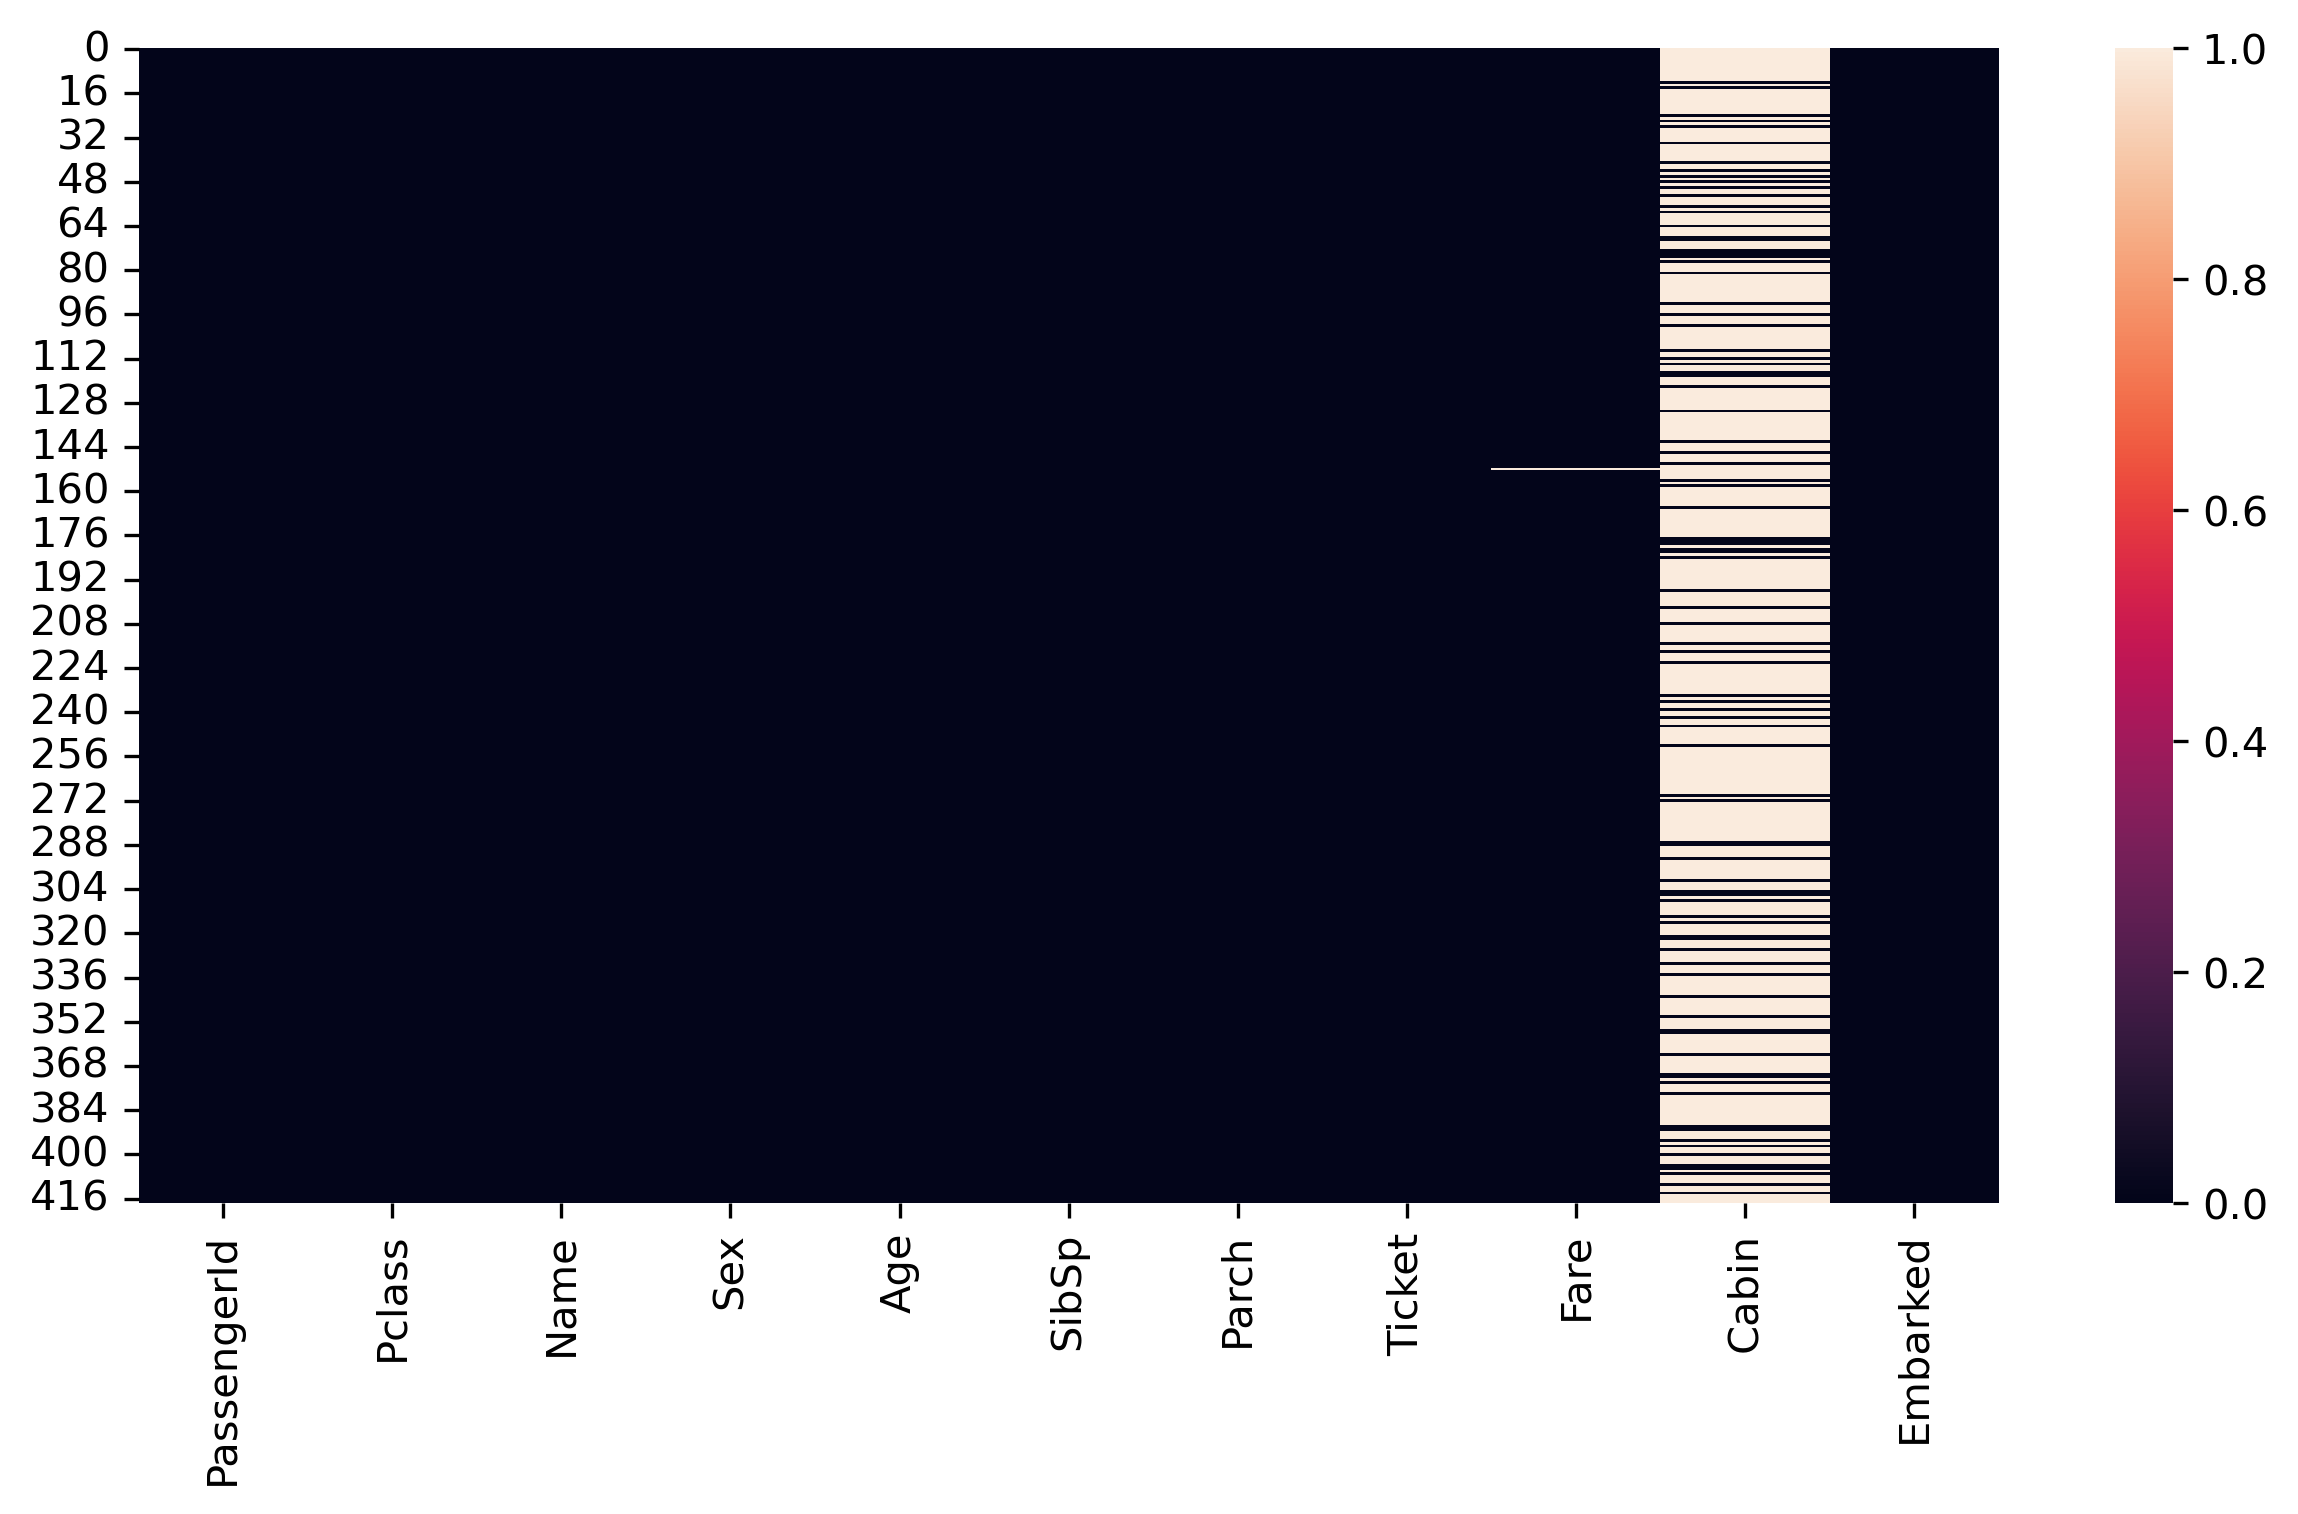

In [19]:
sns.heatmap(data.isna())

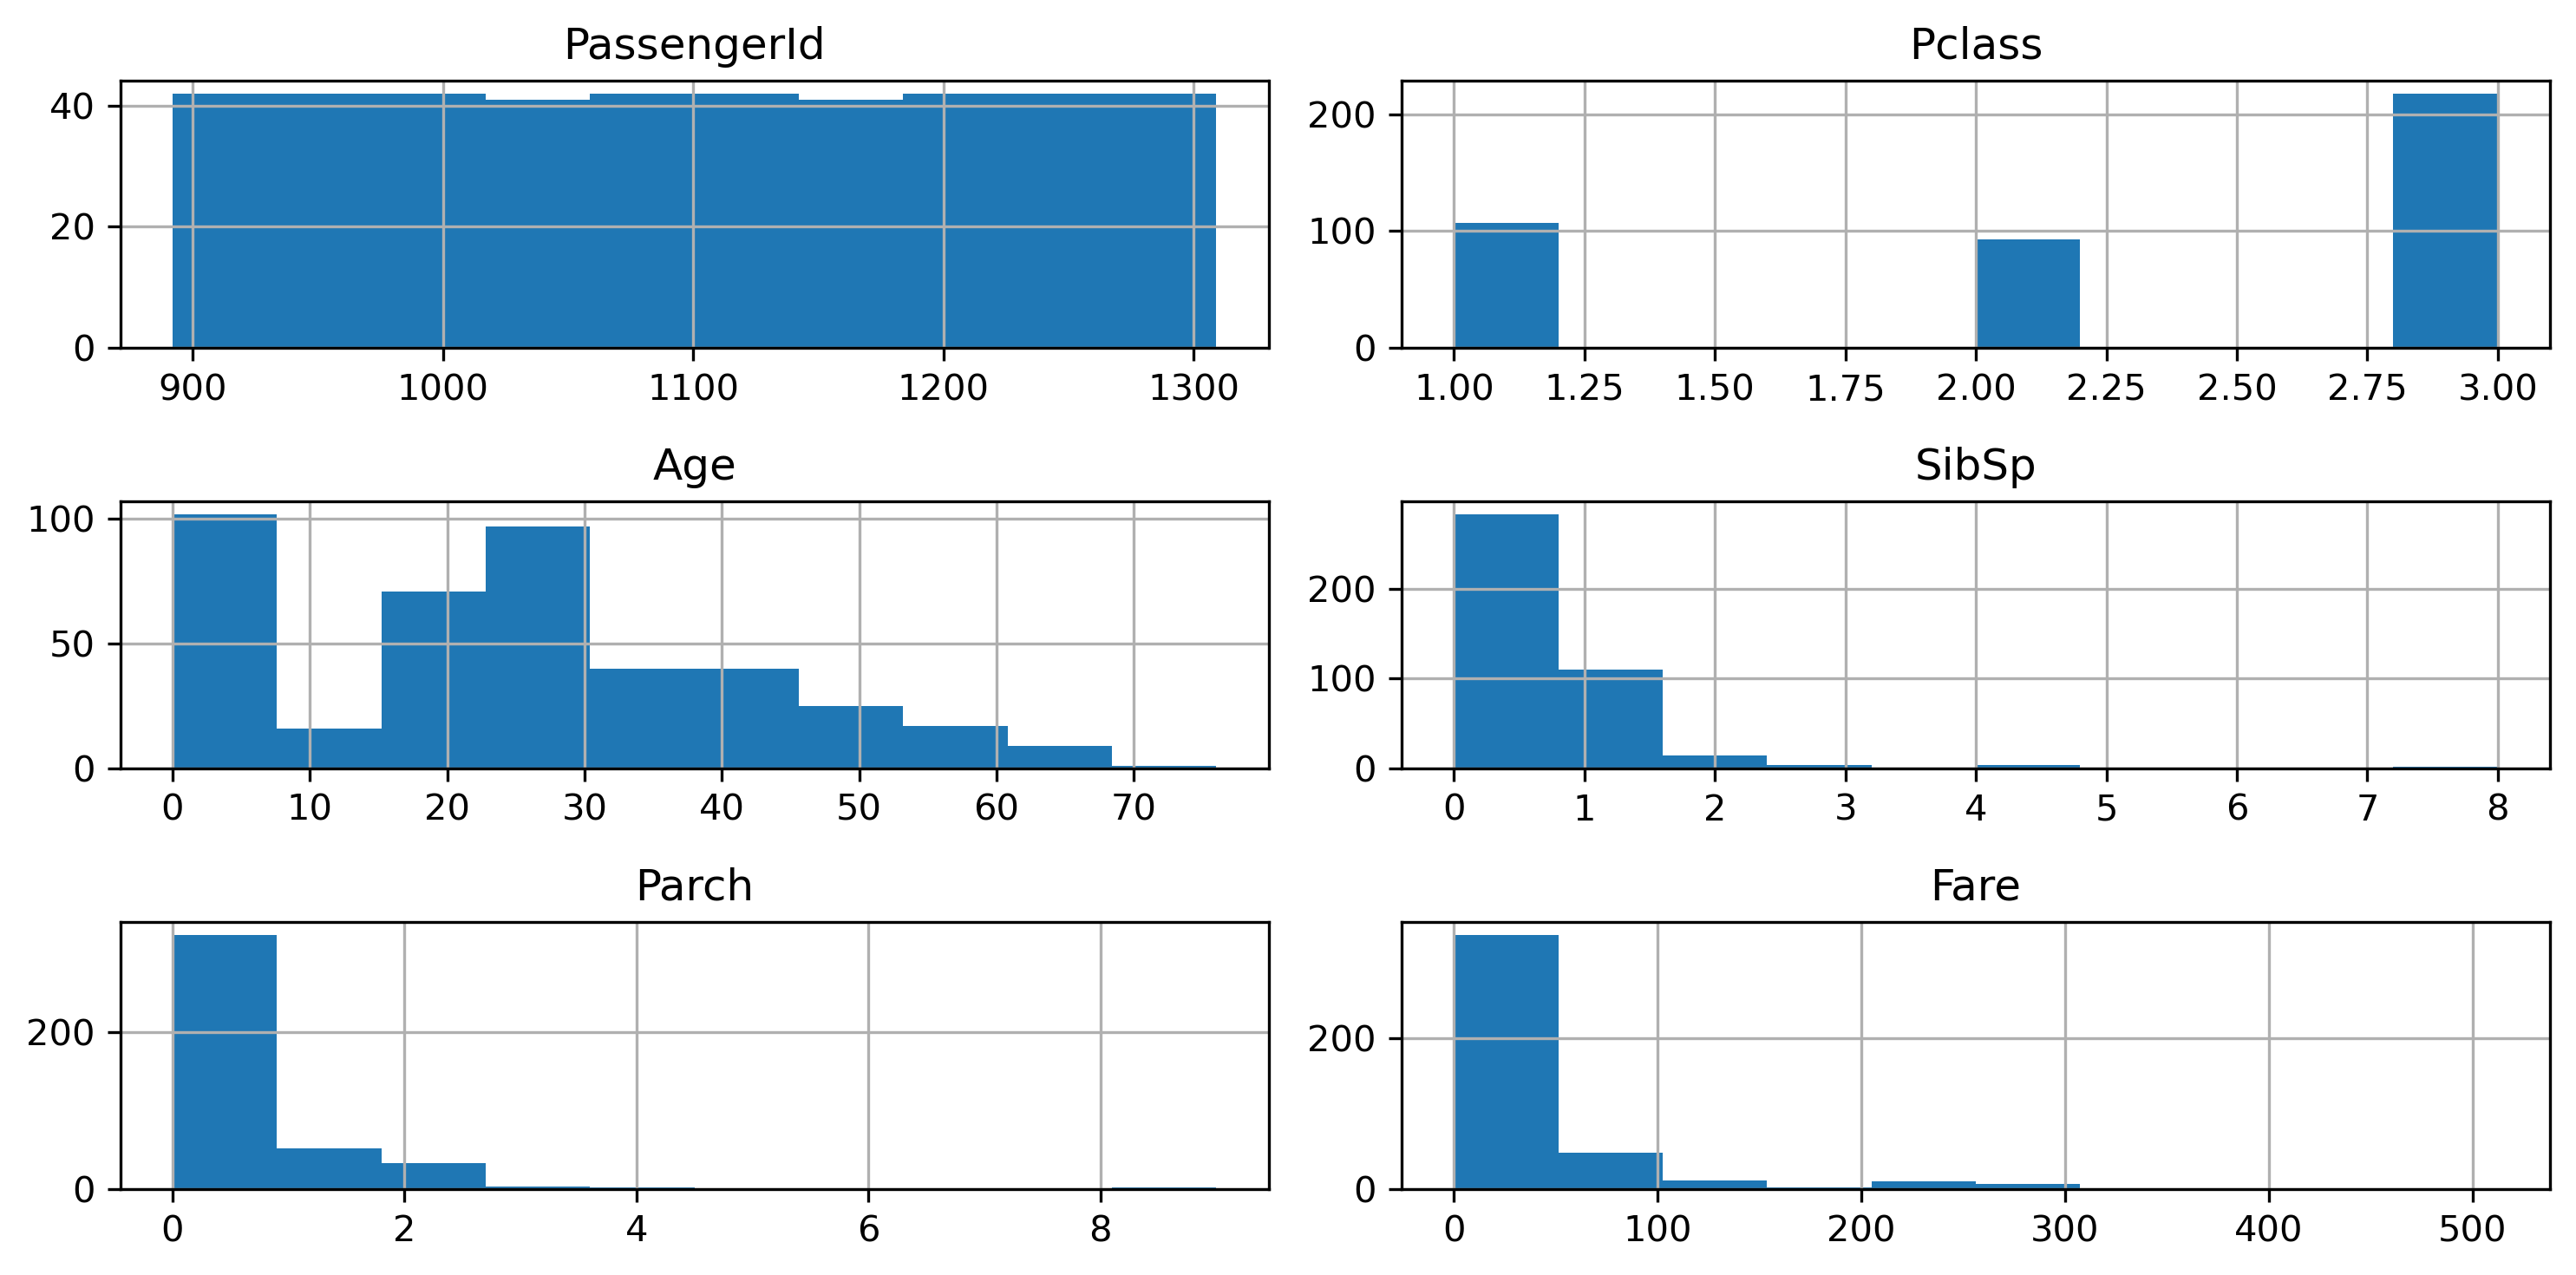

In [20]:
data.hist()
plt.tight_layout()

In [21]:
#we will calculate the percentage of missing values 
for i in data.isna().sum():
    print((i/len(data))*100)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.23923444976076555
78.22966507177034
0.0


In [22]:
#we have a set of rules which tells us that 
# 0 to 5 % missing values: drop rows
# 6 to 45 %: replace the missing values
# 50%: drop column

# as column Cabin having percentage of missing values greater than 50% we will drop this column

In [23]:
data.drop(columns=['Cabin'],inplace=True)

In [24]:
data

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex  Age  SibSp  Parch              Ticket      Fare Embarked  
0      male   34      0      0              330911    7.8292        Q  
1    female   47      1      0              363272    7.0000        S  
2      male   62      0      0              240276    9.6875        Q  
3      male   27      0      0              315154    8.6625        S  
4    female   22      1      1             3101298   12.2875        S  
..      ...  ...    ...    ...                 ...       ...      ...  
413    male    0      0      0           A.5. 3236    8.0500        S  
414  female   39      0      0            PC 17758  108.9000        C  
415    male   38      0      0  SOTON/O.Q. 3101262    7.2500        S  
416    male    0      0      0              359309    8.0500        S  
417    male    0      1      1                2668   22.3583        C  

[418 rows x 10 columns]

In [25]:
#now for column Embarked 
data['Fare'].value_counts()

Fare
7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: count, Length: 169, dtype: int64

In [26]:
# we will fill those null values with the mode 
data['Fare'].fillna(data['Fare'].median(),inplace=True)

In [27]:
data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

#### Outlier Detection and Treatment

<Axes: >

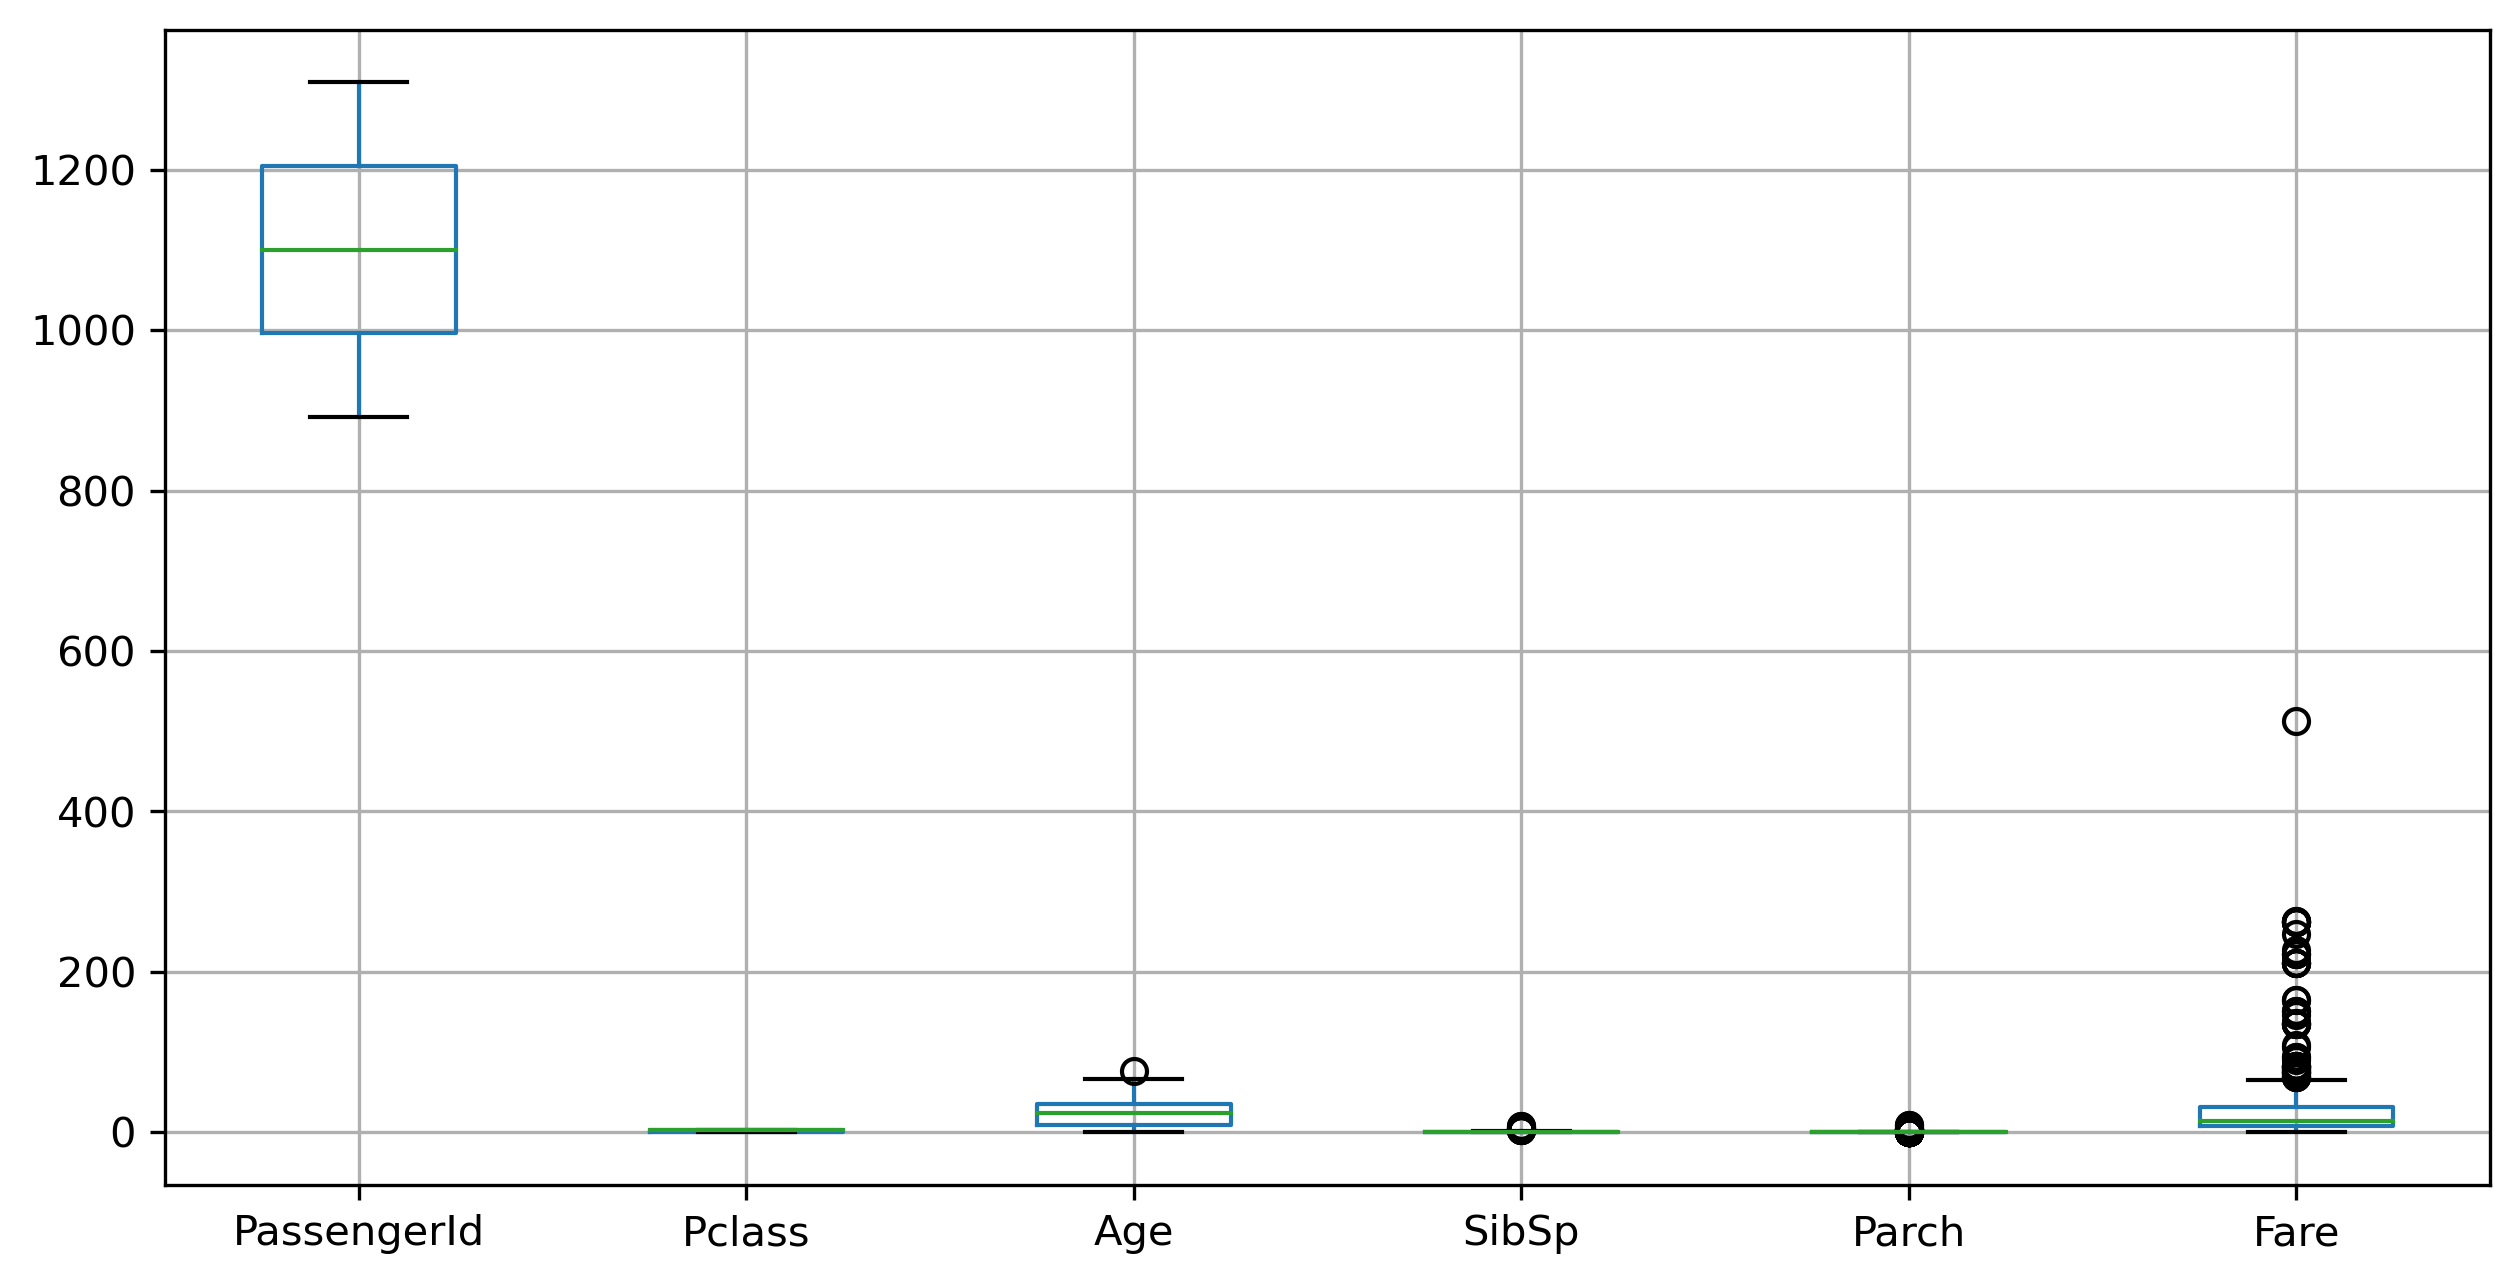

In [29]:
data.boxplot()

In [30]:
# from boxplot we can see that there are the ouliers present in columns Age, SibSp, Parch, Fare
# we will define a function to calculate upper_extreme and lower_extreme
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr= q3 - q1
    
    upper_extreme = q3 + (1.5 * iqr)
    lower_extreme = q1 - (1.5 * iqr)
    
    return lower_extreme,upper_extreme

In [31]:
# now we will define a function to treat ouliers
def outlier_treatment(data,colname):
    lower_extreme, upper_extreme = outlier_detection(data,colname)
    data.loc[data[colname]>upper_extreme,colname] = upper_extreme
    data.loc[data[colname]<lower_extreme,colname] = lower_extreme
    
    print(f"All the outliers are treated for {colname} column !!!")

In [32]:
# calling outlier_treatment function to treat outliers
outlier_treatment(data,'Age')

All the outliers are treated for Age column !!!


In [33]:
outlier_treatment(data,'SibSp')

All the outliers are treated for SibSp column !!!


In [34]:
outlier_treatment(data,'Parch')

All the outliers are treated for Parch column !!!


In [35]:
outlier_treatment(data,'Fare')

All the outliers are treated for Fare column !!!


In [36]:
data.describe()

PassengerId      Pclass         Age       SibSp  Parch        Fare
count   418.000000  418.000000  418.000000  418.000000  418.0  418.000000
mean   1100.500000    2.265550   24.018840    0.395933    0.0   24.644000
std     120.810458    0.841838   17.603607    0.637033    0.0   21.192933
min     892.000000    1.000000    0.000000    0.000000    0.0    0.000000
25%     996.250000    1.000000    9.000000    0.000000    0.0    7.895800
50%    1100.500000    3.000000   24.000000    0.000000    0.0   14.454200
75%    1204.750000    3.000000   35.750000    1.000000    0.0   31.471875
max    1309.000000    3.000000   75.875000    2.500000    0.0   66.835988

<Axes: >

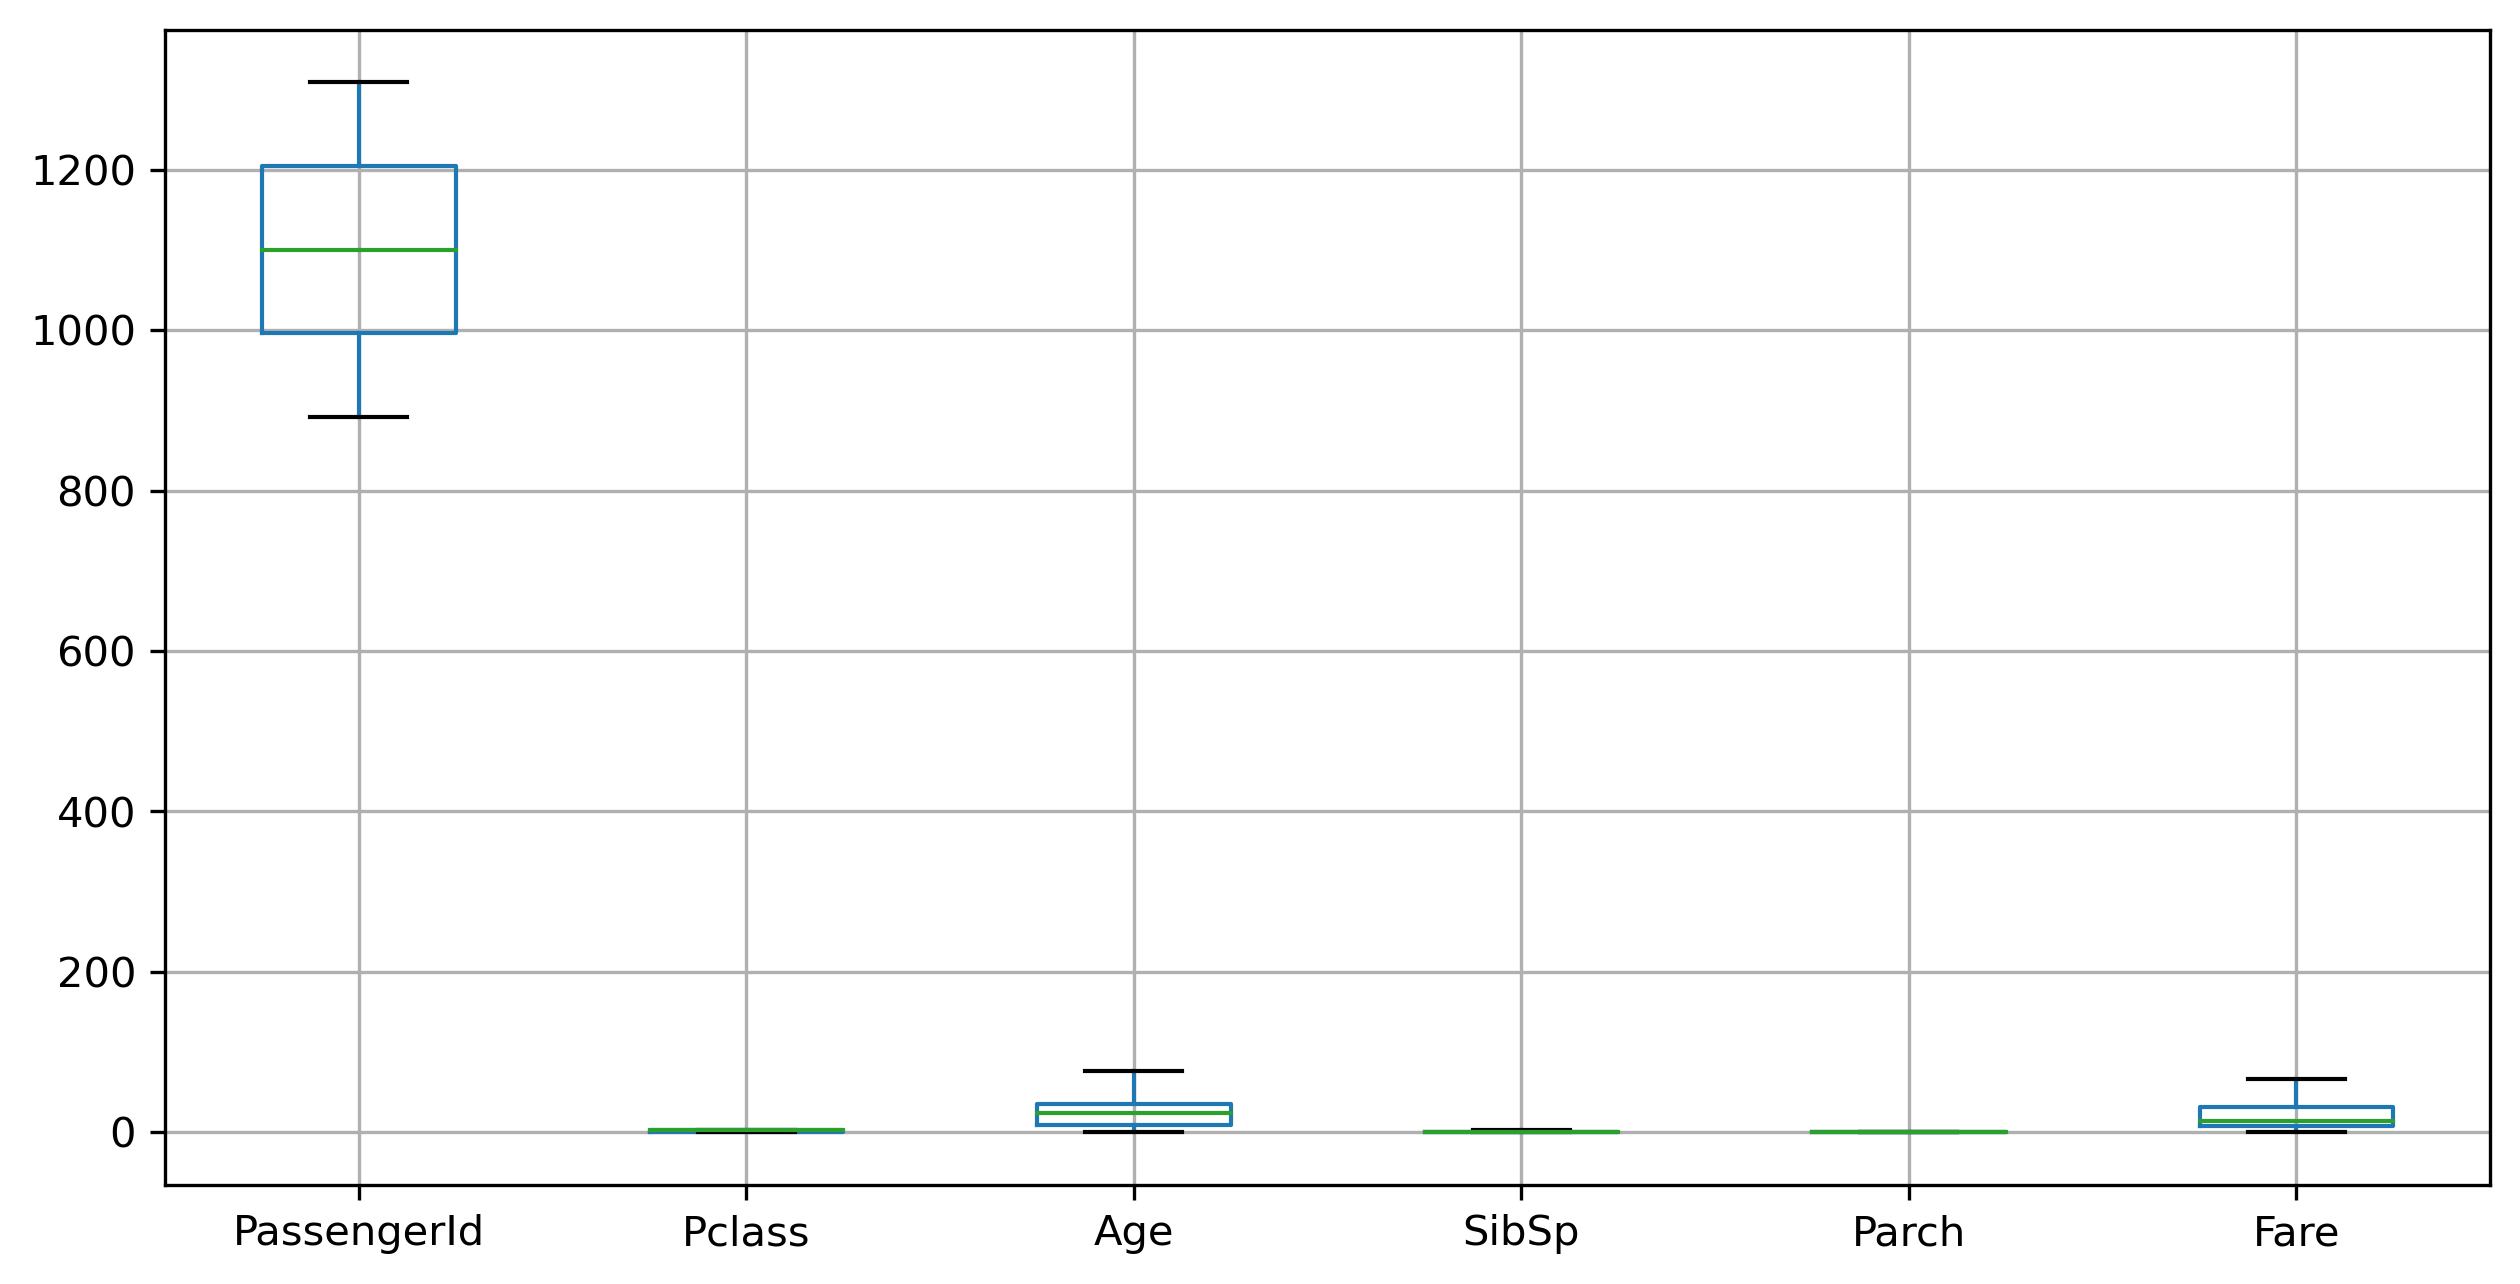

In [37]:
data.boxplot()

In [39]:
data['Age'] = np.nan_to_num(data['Age'], nan=0).astype(int)

In [40]:
# there are three columns which are categorical Sex, Ticket, and Embarked 
# we will encode them using labelEncoder
from sklearn.preprocessing import LabelEncoder

In [41]:
lb = LabelEncoder()
data['Sex'] = lb.fit_transform(data['Sex'])

In [42]:
data['Ticket'] = lb.fit_transform(data['Ticket'])

In [43]:
data['Embarked'] = lb.fit_transform(data['Embarked'])

In [44]:
data

PassengerId  Pclass                                          Name  Sex  \
0            892       3                              Kelly, Mr. James    1   
1            893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2            894       2                     Myles, Mr. Thomas Francis    1   
3            895       3                              Wirz, Mr. Albert    1   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   
..           ...     ...                                           ...  ...   
413         1305       3                            Spector, Mr. Woolf    1   
414         1306       1                  Oliva y Ocana, Dona. Fermina    0   
415         1307       3                  Saether, Mr. Simon Sivertsen    1   
416         1308       3                           Ware, Mr. Frederick    1   
417         1309       3                      Peter, Master. Michael J    1   

     Age  SibSp  Parch  Ticket       Fare  Embarked  
0     34    0.0      0     152   7.829200         1  
1     47    1.0      0     221   7.000000         2  
2     62    0.0      0      73   9.687500         1  
3     27    0.0      0     147   8.662500         2  
4     22    1.0      0     138  12.287500         2  
..   ...    ...    ...     ...        ...       ...  
413    0    0.0      0     267   8.050000         2  
414   39    0.0      0     324  66.835988         0  
415   38    0.0      0     346   7.250000         2  
416    0    0.0      0     220   8.050000         2  
417    0    1.0      0     105  22.358300         0  

[418 rows x 10 columns]

In [49]:
# dropping column PassengerId, Ticket, Title
data.drop(columns = ['Name'], inplace=True)

In [50]:
data.dtypes

Pclass        int64
Sex           int32
Age           int32
SibSp       float64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [51]:
data

Pclass  Sex  Age  SibSp  Parch       Fare  Embarked
0         3    1   34    0.0      0   7.829200         1
1         3    0   47    1.0      0   7.000000         2
2         2    1   62    0.0      0   9.687500         1
3         3    1   27    0.0      0   8.662500         2
4         3    0   22    1.0      0  12.287500         2
..      ...  ...  ...    ...    ...        ...       ...
413       3    1    0    0.0      0   8.050000         2
414       1    0   39    0.0      0  66.835988         0
415       3    1   38    0.0      0   7.250000         2
416       3    1    0    0.0      0   8.050000         2
417       3    1    0    1.0      0  22.358300         0

[418 rows x 7 columns]

#### Model Building

In [53]:
# dividing data into train and test 
x = data.drop('Pclass',axis = 1)
y = data['Pclass']

In [54]:
classifier = LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [56]:
y_pred = classifier.predict(x)

In [57]:
y_pred

array([3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 1, 2, 1, 3, 3, 3, 3, 3, 1, 3,
       2, 1, 1, 3, 1, 3, 2, 3, 2, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3,
       1, 3, 1, 3, 1, 2, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3,
       3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 2, 3, 3, 3, 1, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 2, 2, 3, 1, 3, 3, 2, 1, 3, 2, 3,
       3, 3, 1, 3, 2, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 1, 1, 1, 3, 1, 1, 3, 1, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 1, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 2, 3, 1, 2, 3, 1, 3, 1, 1, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 2, 2, 1, 2, 3, 3, 1, 3, 1, 3, 3, 1, 1, 2,
       1, 3, 3, 1, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 3, 2, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3,

In [58]:
y_pred_df = pd.DataFrame({'Y': y,
                         'YHat' : classifier.predict(x)})

In [59]:
y_pred_df

Y  YHat
0    3     3
1    3     3
2    2     2
3    3     3
4    3     3
..  ..   ...
413  3     3
414  1     1
415  3     3
416  3     3
417  3     3

[418 rows x 2 columns]

#### Model Evaluation

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print(confusion_matrix)

[[ 87  13   7]
 [ 10  31  52]
 [  6   8 204]]


In [61]:
print(f"Accuracy : {((467+236)/(467+82+106+236))*100}")

Accuracy : 78.90011223344557


In [125]:
# ROC Curve

In [62]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

Skipping ROC for class 0 due to insufficient class diversity.


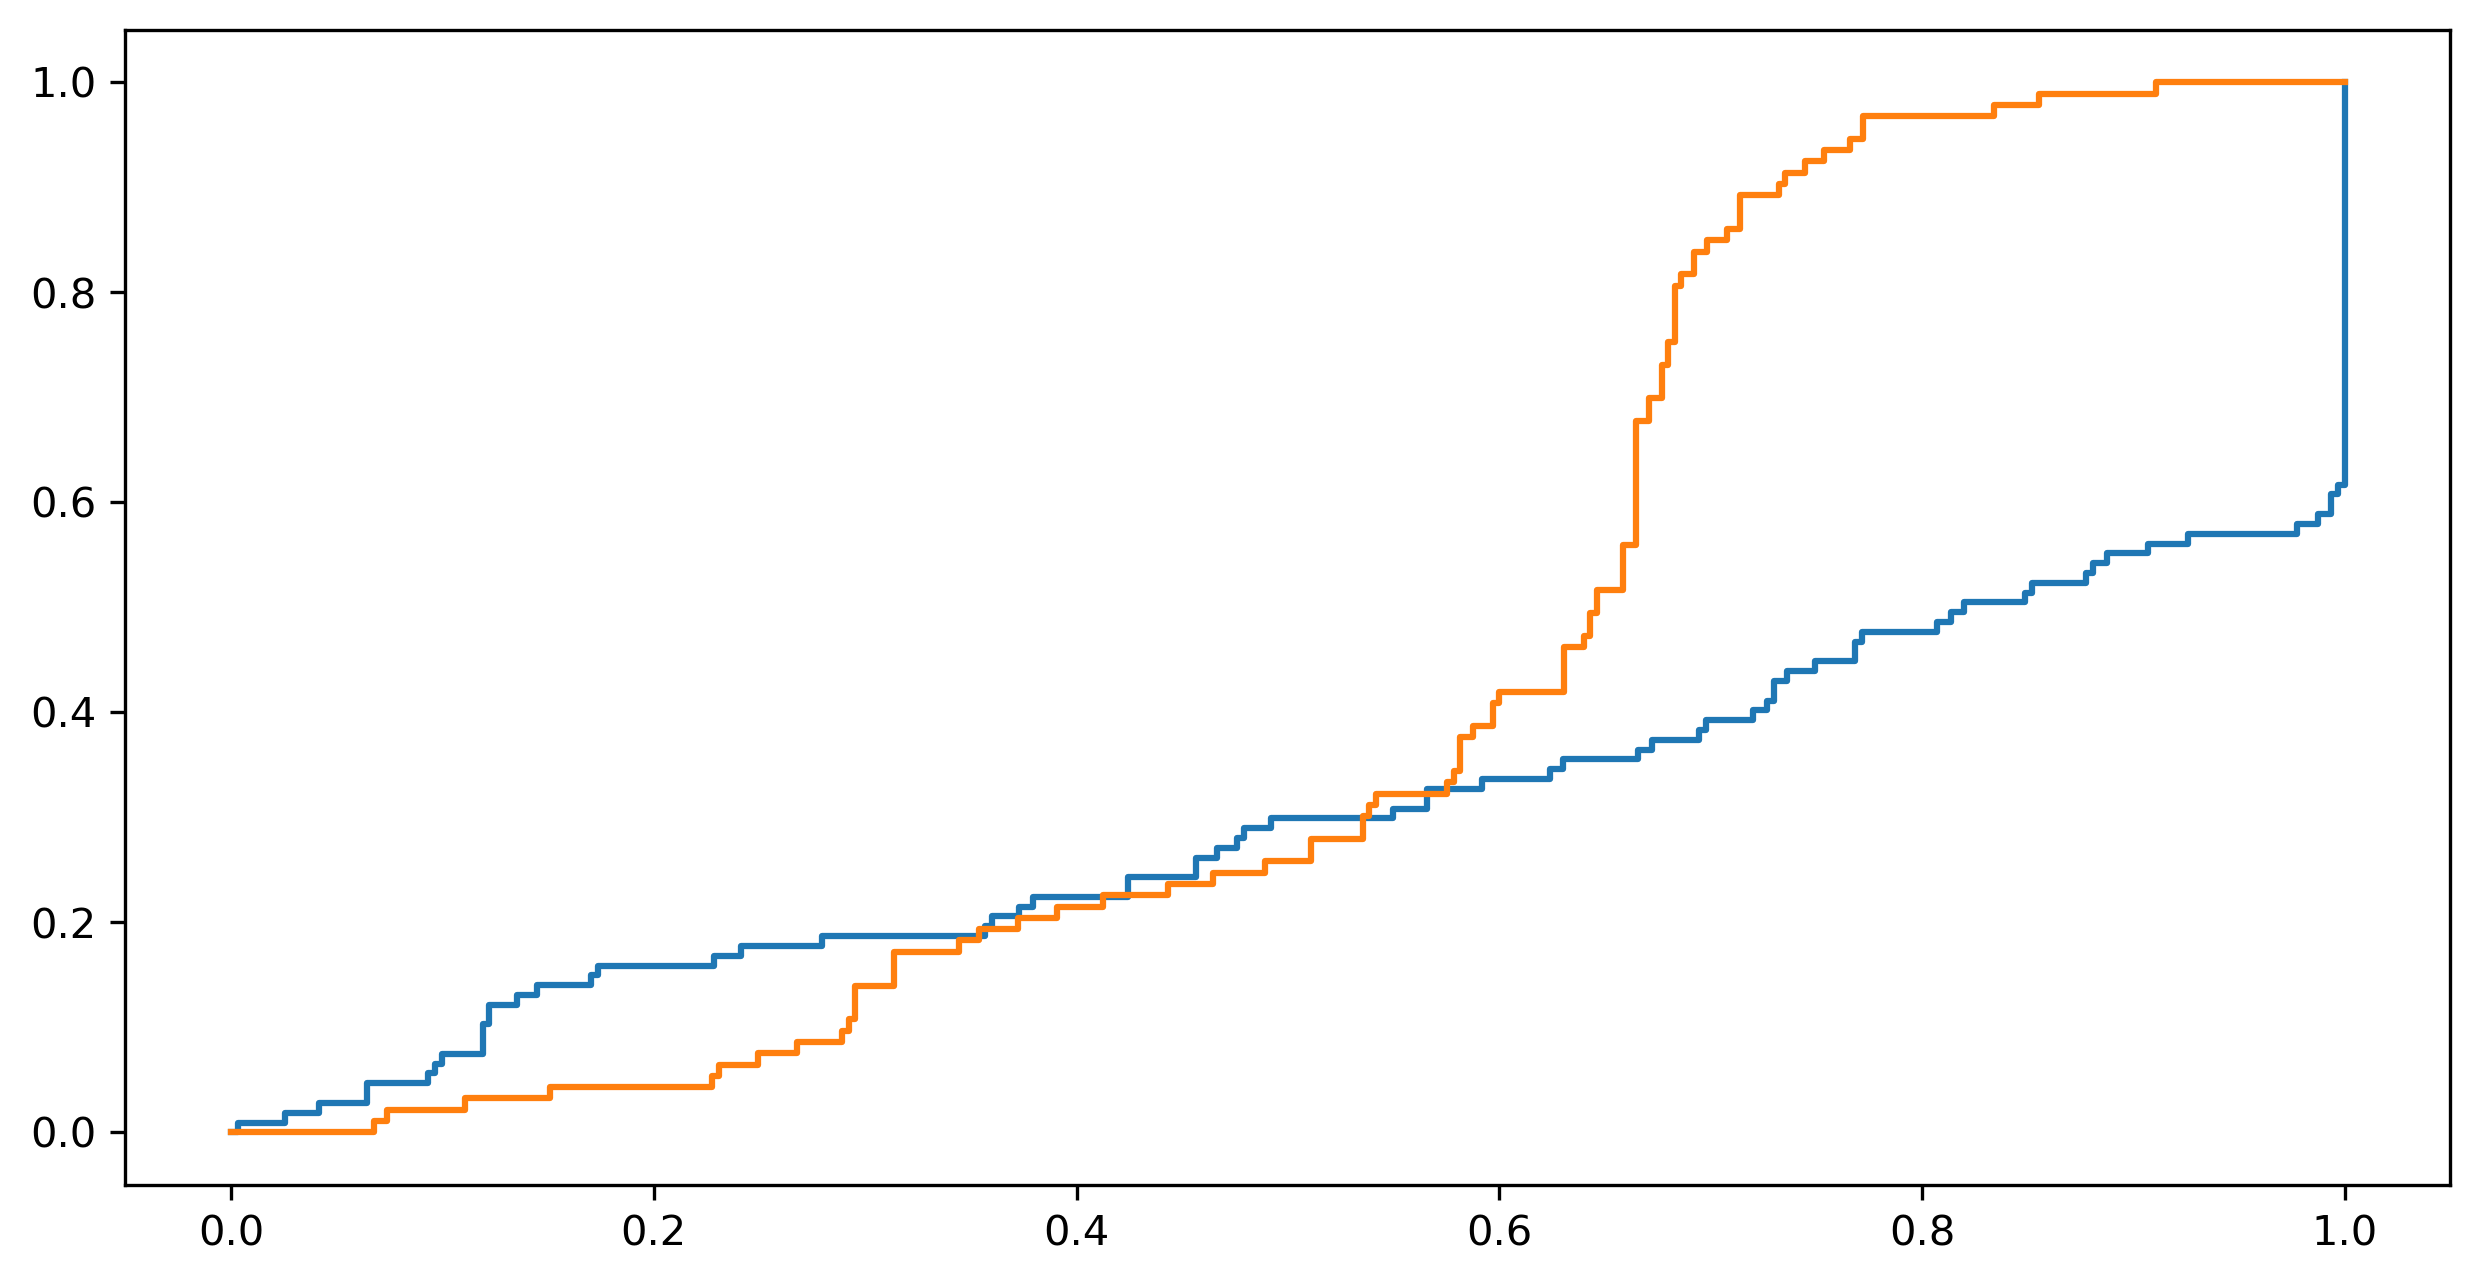

In [144]:
for i in range(n_classes):
    y_true = y_bin[:, i]
    y_score = classifier.predict_proba(x)[:, i]
    
    if len(np.unique(y_true)) < 2:
        print(f"Skipping ROC for class {i} due to insufficient class diversity.")
        continue
    
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    auc = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, label=f"Class {i} (area = {auc:.2f})")
    has_labels = True

In [146]:
classifier.coef_

array([[-1.25291009e-03, -1.75276307e-02,  3.10823895e-02,
        -4.43659344e-01,  0.00000000e+00, -5.79791308e-03,
         8.56977141e-02, -6.49679339e-01, -1.21696266e-02],
       [-1.16933792e-04,  1.99230622e-02,  7.99458302e-03,
        -1.50155203e-01,  0.00000000e+00,  2.64270243e-04,
         4.86903885e-04,  5.64834452e-01, -9.24188432e-02],
       [ 1.36984388e-03, -2.39543156e-03, -3.90769725e-02,
         5.93814547e-01,  0.00000000e+00,  5.53364283e-03,
        -8.61846180e-02,  8.48448877e-02,  1.04588470e-01]])

#### Interview Questions

In [66]:
'''
1. What is the difference between precision and recall?
-> Precision is the ratio of correctly predicted positive observations to the total predicted positives, reflecting how 
   accurate the positive predictions are. Recall is the ratio of correctly predicted positives to the total actual positives, 
   indicating the model’s ability to capture all relevant instances.
   
2. What is cross-validation, and why is it important in binary classification?
-> Cross-validation is a technique for assessing how a model generalizes to new data by splitting the dataset into several 
   parts for training and testing iteratively. It’s crucial in binary classification as it helps prevent overfitting, ensuring 
   the model performs well on unseen data.
'''

'\n1. What is the difference between precision and recall?\n-> Precision is the ratio of correctly predicted positive observations to the total predicted positives, reflecting how \n   accurate the positive predictions are. Recall is the ratio of correctly predicted positives to the total actual positives, \n   indicating the model’s ability to capture all relevant instances.\n   \n2. What is cross-validation, and why is it important in binary classification?\n-> Cross-validation is a technique for assessing how a model generalizes to new data by splitting the dataset into several \n   parts for training and testing iteratively. It’s crucial in binary classification as it helps prevent overfitting, ensuring \n   the model performs well on unseen data.\n'

In [52]:
import pickle

In [55]:
pickle.dump(classifier,open('lr_test.pkl','wb'))